# Brain Tumor Classification - Fast Test Version

- **Dataset paths** updated to local Windows directories.
- **Epochs** reduced to 2 for quick testing.
- **Batch size** reduced to 8 for faster iteration.

This notebook is optimized for rapid testing and debugging.

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/2
Epoch 1/2
714/714 ━━━━━━━━━━━━━━━━━━━━ 196s 270ms/step - accuracy: 0.4724 - loss: 1.1517 - val_accuracy: 0.4401 - val_loss: 1.7620
Epoch 2/2
714/714 ━━━━━━━━━━━━━━━━━━━━ 196s 270ms/step - accuracy: 0.4724 - loss: 1.1517 - val_accuracy: 0.4401 - val_loss: 1.7620
Epoch 2/2
714/714 ━━━━━━━━━━━━━━━━━━━━ 181s 253ms/step - accuracy: 0.6532 - loss: 0.8291 - val_accuracy: 0.6262 - val_loss: 1.0319
714/714 ━━━━━━━━━━━━━━━━━━━━ 181s 253ms/step - accuracy: 0.6532 - loss: 0.8291 - val_accuracy: 0.6262 - val_loss: 1.0319


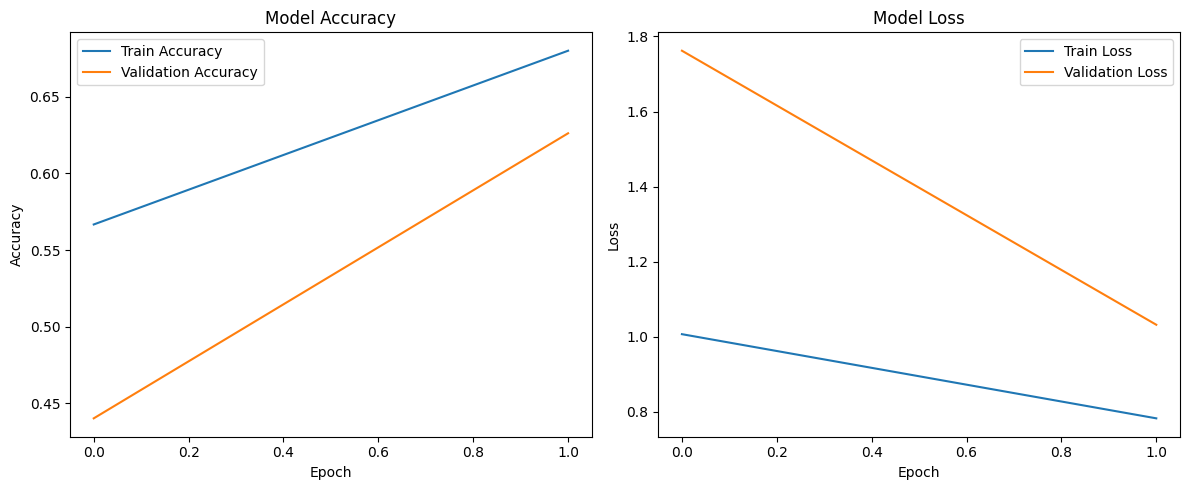

Final Training Accuracy: 68.01%
Final Validation Accuracy: 62.62%


In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import build_model from the correct location
sys.path.append(r'd:/Projects/code-storm/cancer-prediction/model/model')
from model import build_model
from tensorflow.keras.optimizers import Adam

# === PATH TO YOUR DATASET (Windows local paths) ===
train_dir = r'd:/Projects/code-storm/cancer-prediction/Training/brain-data/Training'
test_dir = r'd:/Projects/code-storm/cancer-prediction/Training/brain-data/Testing'

img_size = 150

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=8,  # Reduced for faster testing
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=8,  # Reduced for faster testing
    class_mode='categorical'
)

# Model
model = build_model(img_size=img_size, num_classes=4)
history = model.fit(train_data, epochs=2, validation_data=test_data)  # Reduced epochs for speed
os.makedirs(r'd:/Projects/code-storm/cancer-prediction/model', exist_ok=True)
model.save(r'd:/Projects/code-storm/cancer-prediction/model/brain_tumor_model.keras')
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
# Print final accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")

In [ ]:
# Training





In [ ]:
# Save model

